## Chargement des Données


In [1]:
import pandas as pd


# Essayer avec l'encodage 'ISO-8859-1'
df = pd.read_csv('données/Nettoyées_Et_Modifiées/Elections/Elections_12_17_22.csv', sep=';', encoding='ISO-8859-1')

# ou essayer avec l'encodage 'cp1252'
# df = pd.read_csv('données/Nettoyées_Et_Modifiées/Elections/Elections_12_17_22.csv', sep=';', encoding='cp1252')


In [18]:
import numpy as np

# Vérifier les valeurs manquantes
missing_values = df[['Nombre_voix', 'Abstentions']].isna().sum()
print("Valeurs manquantes :")
print(missing_values)

# Vérifier les valeurs infinies
infinite_values = df[['Nombre_voix', 'Abstentions']].applymap(np.isinf).sum()
print("Valeurs infinies :")
print(infinite_values)
 

Valeurs manquantes :
Nombre_voix    0
Abstentions    0
dtype: int64
Valeurs infinies :
Nombre_voix    0
Abstentions    0
dtype: int64


c:\Temp\ipykernel_16880\2503085252.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  infinite_values = df[['Nombre_voix', 'Abstentions']].applymap(np.isinf).sum()


In [2]:
 df.head()


,Annee,Tour,Nombre_candidat,Code_du_departement,Libelle_du_departement,Code_de_la_commune,Libelle_de_la_commune,Inscrits,Abstentions,Nombre_votants,Blancs_et_nulls,Nom_candidat,Sexe,Age,Nombre_voix,Parti_politique,Orientation_politique
0,2012,1,10,75,PARIS,56,Paris,1253322,248755,1004567,12093,joly,F,39.0,41495,Europe Ecologie Les Verts,"Ecologiste, Gauche"
1,2012,1,10,75,PARIS,56,Paris,1253322,248755,1004567,12093,le pen,F,43.0,61503,Front National,Extremes droite
2,2012,1,10,75,PARIS,56,Paris,1253322,248755,1004567,12093,sarkozy,H,57.0,319482,Union pour un Mouvement Populaire,"Droite, Centre-droit"
3,2012,1,10,75,PARIS,56,Paris,1253322,248755,1004567,12093,melenchon,H,61.0,110101,Parti de Gauche,"Gauche radicale, Trotskiste"
4,2012,1,10,75,PARIS,56,Paris,1253322,248755,1004567,12093,poutou,H,46.0,6644,Nouveau Parti Anticapitaliste,"Gauche radicale, Anticapitaliste"


## Analyse des Distributions



### Distribution des Âges des Candidats


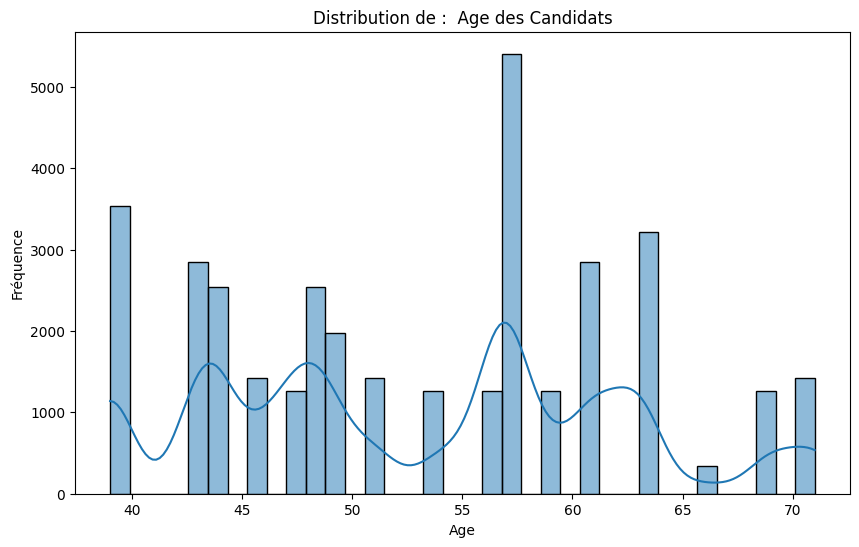

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme de l'âge des candidats
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution de :  Age des Candidats')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.show()


### Distribution du Nombre de Voix


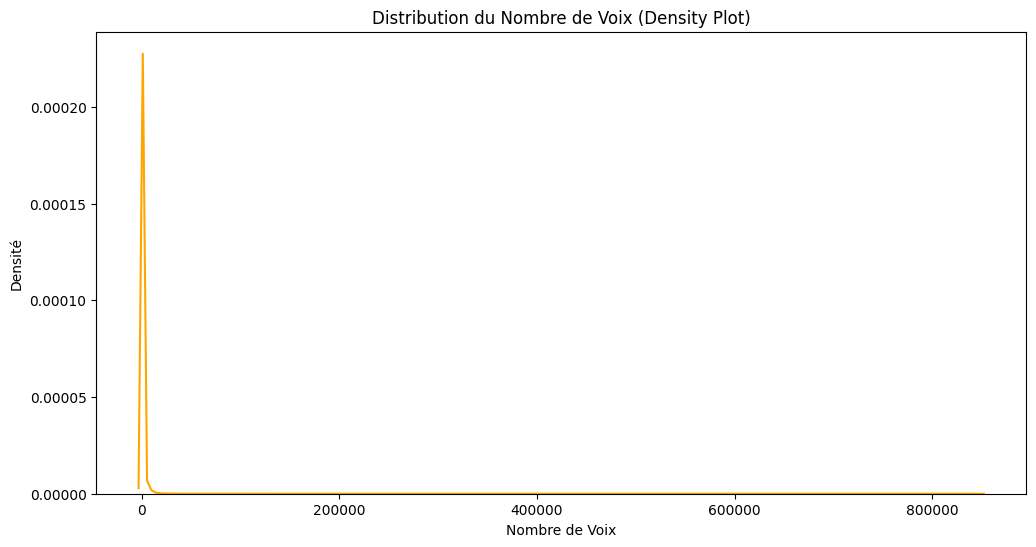

In [10]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Nombre_voix'], color='orange')
plt.title('Distribution du Nombre de Voix (Density Plot)')
plt.xlabel('Nombre de Voix')
plt.ylabel('Densité')
plt.show()


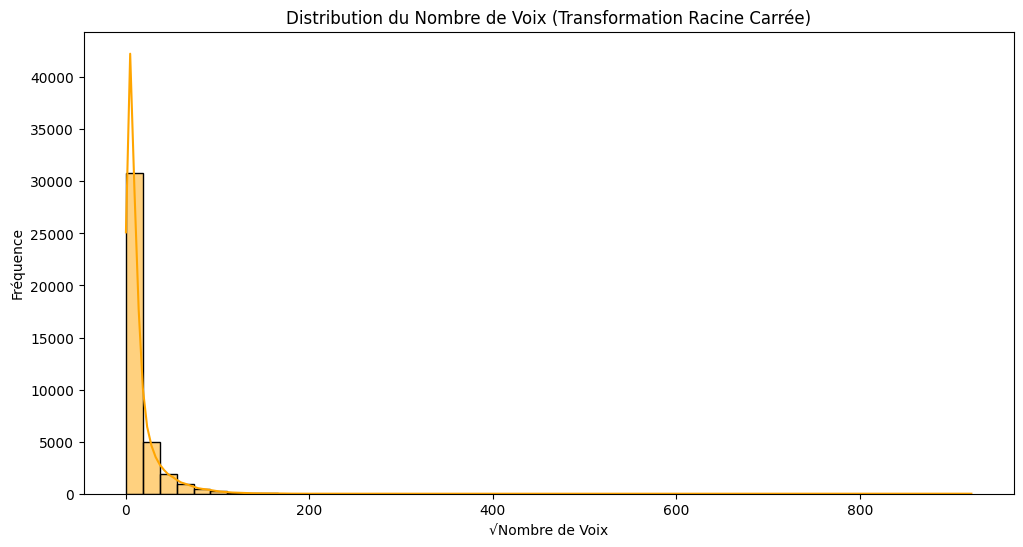

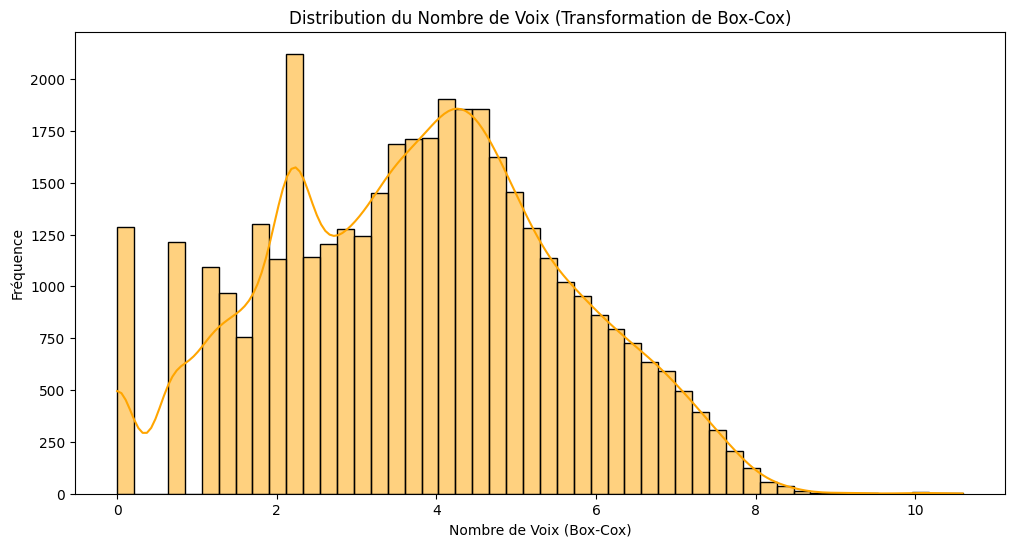

In [9]:
import numpy as np
from scipy import stats

# Transformation racine carrée
plt.figure(figsize=(12, 6))
sns.histplot(np.sqrt(df['Nombre_voix']), kde=True, color='orange', bins=50)
plt.title('Distribution du Nombre de Voix (Transformation Racine Carrée)')
plt.xlabel('√Nombre de Voix')
plt.ylabel('Fréquence')
plt.show()

# Transformation de Box-Cox
df['Nombre_voix_boxcox'], _ = stats.boxcox(df['Nombre_voix'] + 1)  # Ajouter 1 pour éviter les valeurs nulles
plt.figure(figsize=(12, 6))
sns.histplot(df['Nombre_voix_boxcox'], kde=True, color='orange', bins=50)
plt.title('Distribution du Nombre de Voix (Transformation de Box-Cox)')
plt.xlabel('Nombre de Voix (Box-Cox)')
plt.ylabel('Fréquence')
plt.show()


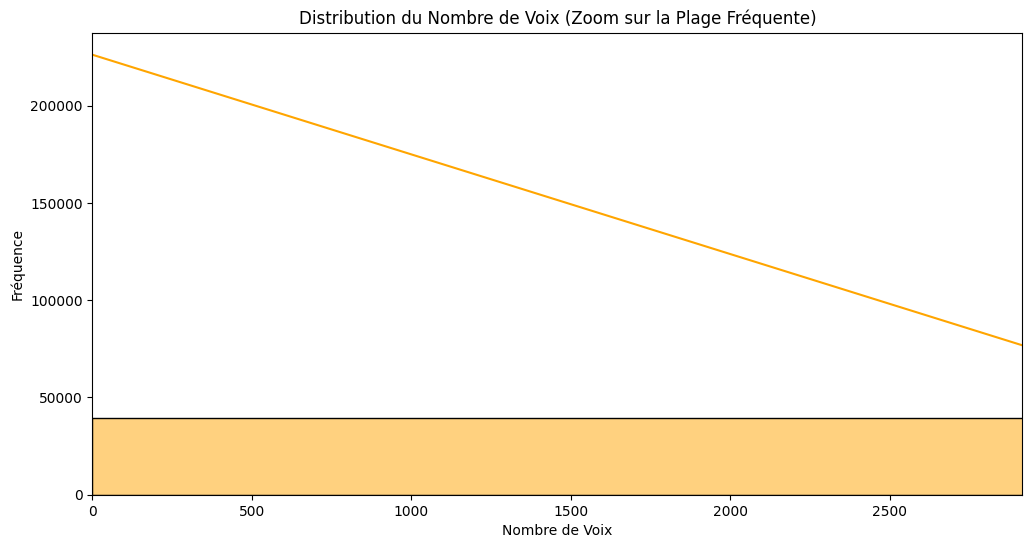

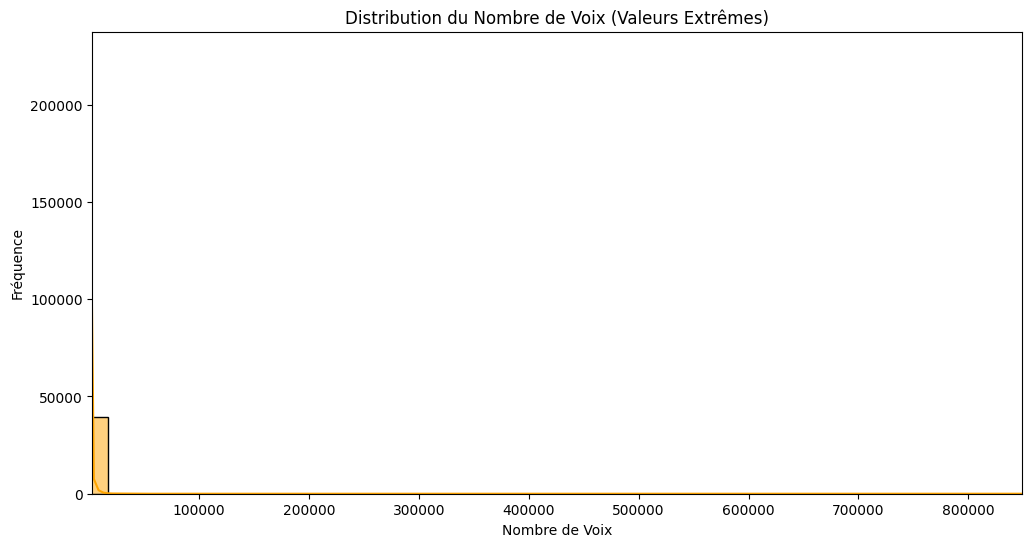

In [8]:
# Zoomer sur la plage des valeurs les plus fréquentes
plt.figure(figsize=(12, 6))
sns.histplot(df['Nombre_voix'], kde=True, color='orange', bins=50)
plt.title('Distribution du Nombre de Voix (Zoom sur la Plage Fréquente)')
plt.xlabel('Nombre de Voix')
plt.ylabel('Fréquence')
plt.xlim(0, df['Nombre_voix'].quantile(0.95))  # Limite à 95% des valeurs
plt.show()

# Examiner les valeurs extrêmes
plt.figure(figsize=(12, 6))
sns.histplot(df['Nombre_voix'], kde=True, color='orange', bins=50)
plt.title('Distribution du Nombre de Voix (Valeurs Extrêmes)')
plt.xlabel('Nombre de Voix')
plt.ylabel('Fréquence')
plt.xlim(df['Nombre_voix'].quantile(0.95), df['Nombre_voix'].max())  # Limite aux valeurs extrêmes
plt.show()


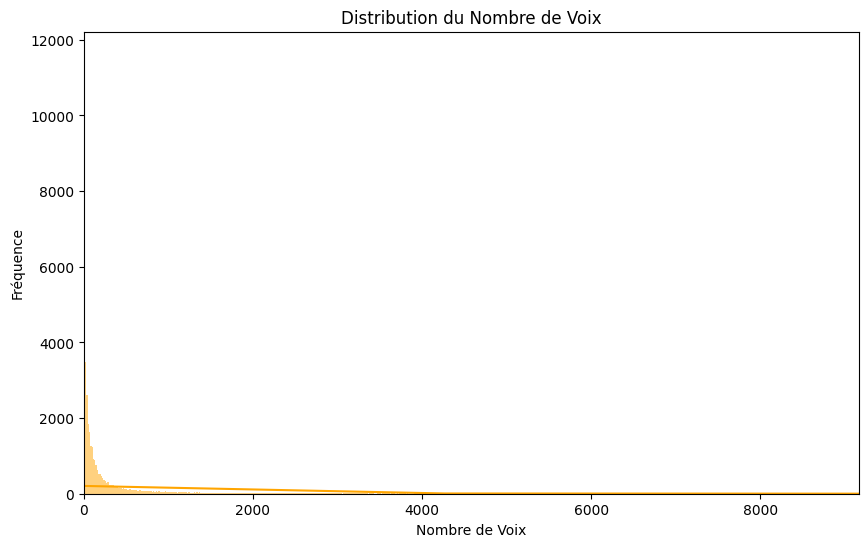

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Nombre_voix'], kde=True, color='orange')
plt.title('Distribution du Nombre de Voix')
plt.xlabel('Nombre de Voix')
plt.ylabel('Fréquence')
plt.xlim(0, df['Nombre_voix'].quantile(0.99))  # Limite à 99% des valeurs
plt.show()


### Distribution des Abstentions et Nombre de Votants


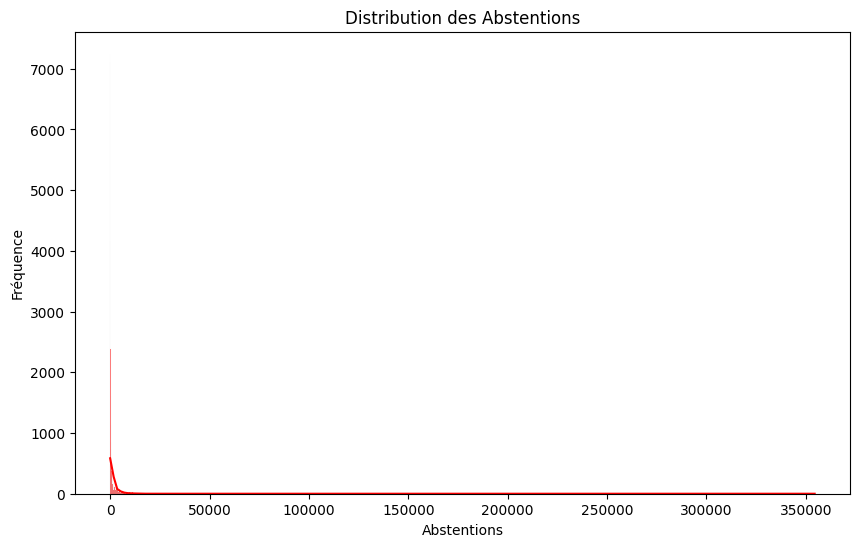

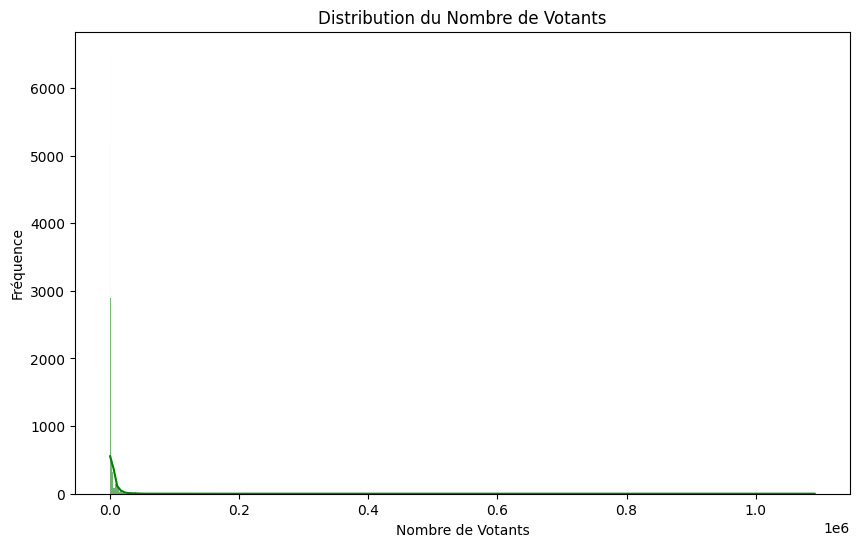

In [6]:
# Histogramme des abstentions
plt.figure(figsize=(10, 6))
sns.histplot(df['Abstentions'], kde=True, color='red')
plt.title('Distribution des Abstentions')
plt.xlabel('Abstentions')
plt.ylabel('Fréquence')
plt.show()

# Histogramme du nombre de votants
plt.figure(figsize=(10, 6))
sns.histplot(df['Nombre_votants'], kde=True, color='green')
plt.title('Distribution du Nombre de Votants')
plt.xlabel('Nombre de Votants')
plt.ylabel('Fréquence')
plt.show()


# Histogramme des abstentions avec limites ajustées

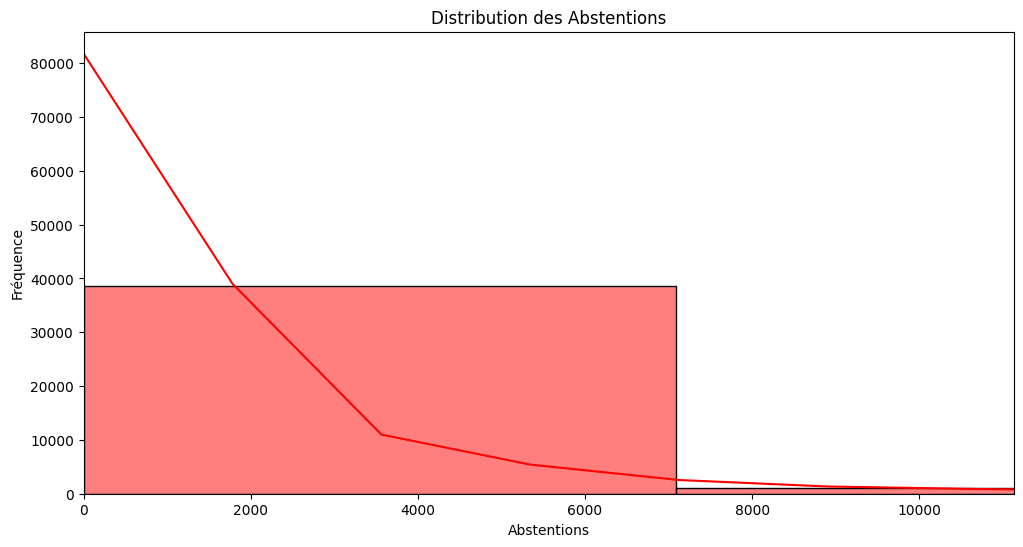

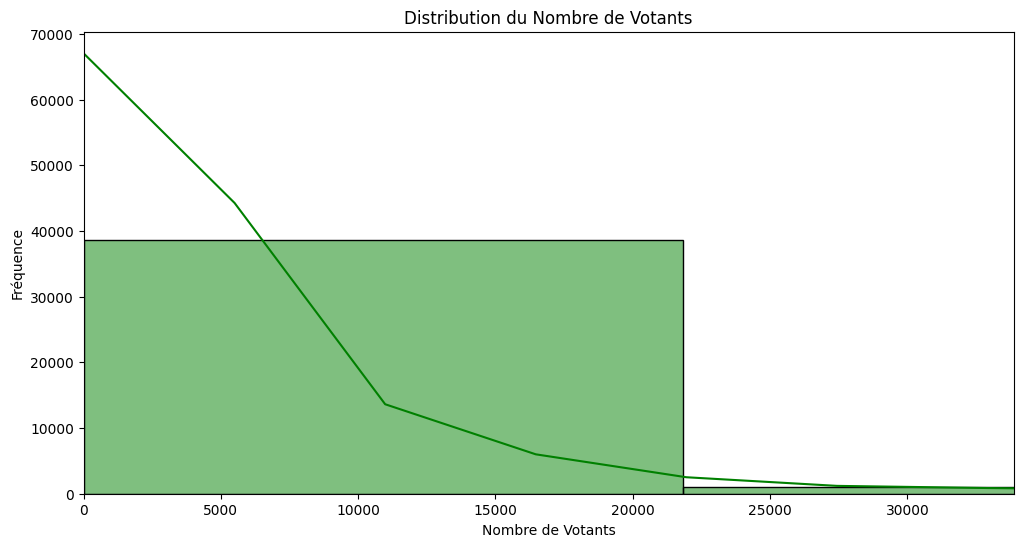

In [11]:
# Histogramme des abstentions avec limites ajustées
plt.figure(figsize=(12, 6))
sns.histplot(df['Abstentions'], kde=True, color='red', bins=50)
plt.title('Distribution des Abstentions')
plt.xlabel('Abstentions')
plt.ylabel('Fréquence')
plt.xlim(0, df['Abstentions'].quantile(0.99))  # Limite à 99% des valeurs
plt.show()

# Histogramme du nombre de votants avec limites ajustées
plt.figure(figsize=(12, 6))
sns.histplot(df['Nombre_votants'], kde=True, color='green', bins=50)
plt.title('Distribution du Nombre de Votants')
plt.xlabel('Nombre de Votants')
plt.ylabel('Fréquence')
plt.xlim(0, df['Nombre_votants'].quantile(0.99))  # Limite à 99% des valeurs
plt.show()


# Histogramme des abstentions avec échelle logarithmique

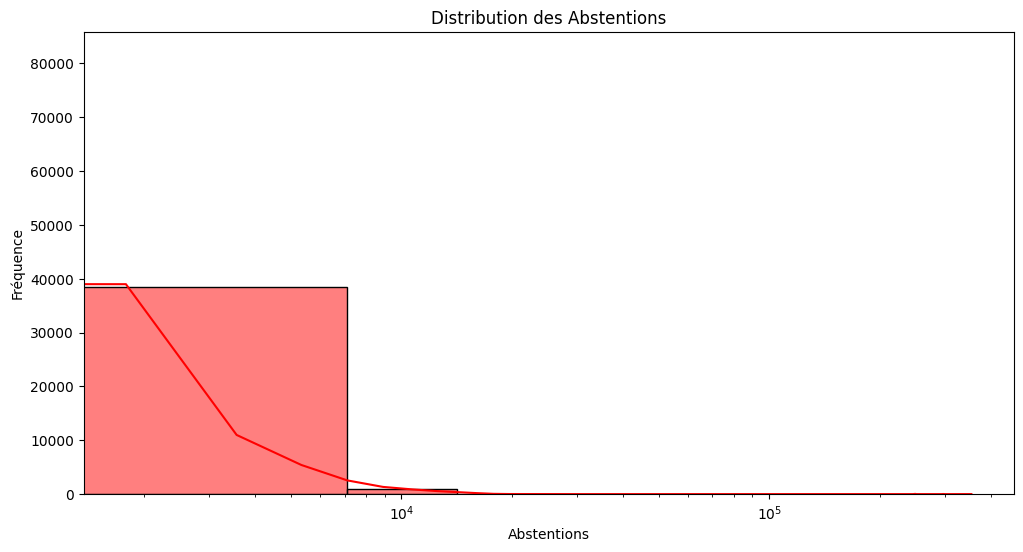

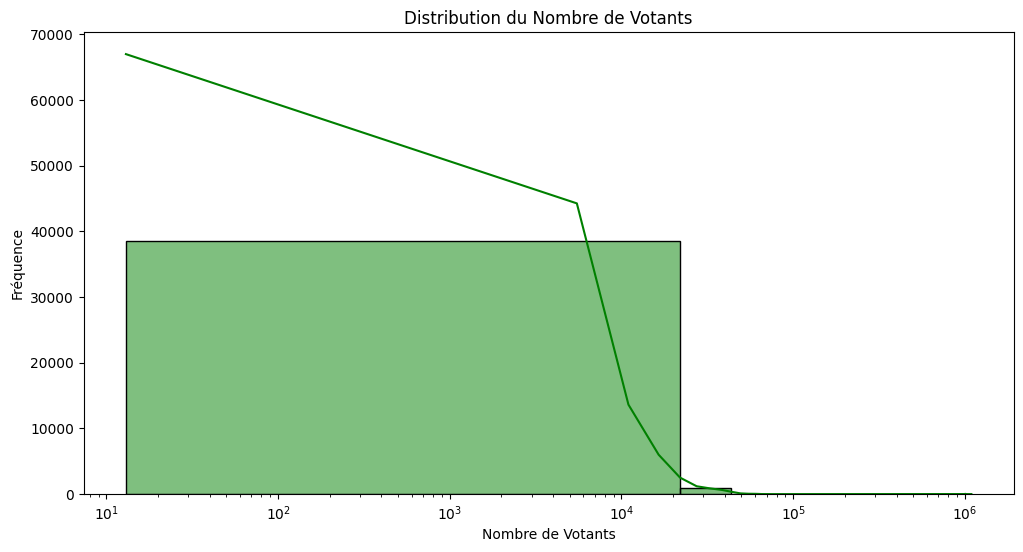

In [12]:
# Histogramme des abstentions avec échelle logarithmique
plt.figure(figsize=(12, 6))
sns.histplot(df['Abstentions'], kde=True, color='red', bins=50)
plt.title('Distribution des Abstentions')
plt.xlabel('Abstentions')
plt.ylabel('Fréquence')
plt.xscale('log')
plt.show()

# Histogramme du nombre de votants avec échelle logarithmique
plt.figure(figsize=(12, 6))
sns.histplot(df['Nombre_votants'], kde=True, color='green', bins=50)
plt.title('Distribution du Nombre de Votants')
plt.xlabel('Nombre de Votants')
plt.ylabel('Fréquence')
plt.xscale('log')
plt.show()


# Calculer le nombre total de votants et d'abstentions par année

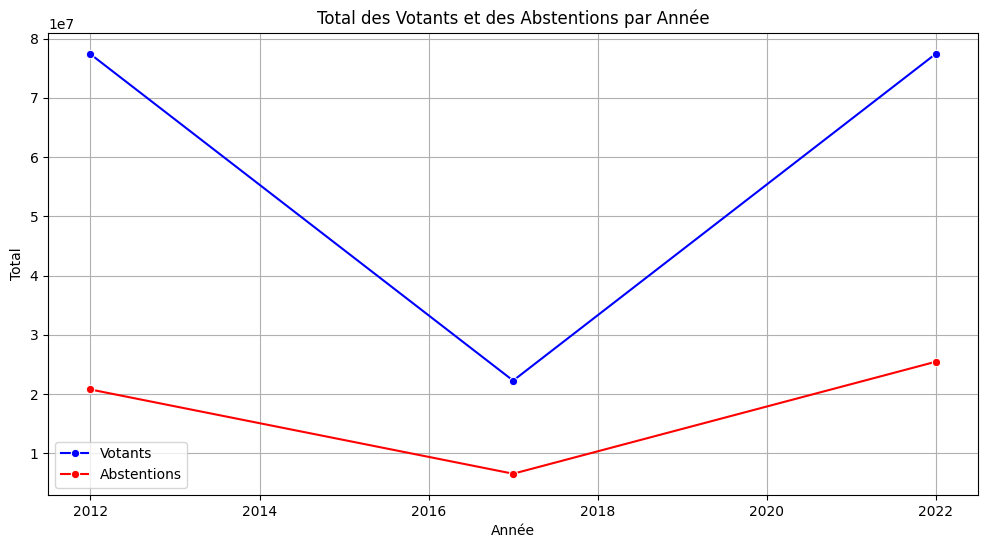

In [13]:
 
years_of_interest = [2012, 2017, 2022]
df_filtered = df[df['Annee'].isin(years_of_interest)]

# Calculer le nombre total de votants et d'abstentions par année
votants_per_year = df_filtered.groupby('Annee')['Nombre_votants'].sum()
abstentions_per_year = df_filtered.groupby('Annee')['Abstentions'].sum()

# Convertir les résultats en DataFrame pour affichage
result_df = pd.DataFrame({
    'Année': years_of_interest,
    'Total Votants': votants_per_year,
    'Total Abstentions': abstentions_per_year
})

# Visualisation
plt.figure(figsize=(12, 6))
sns.lineplot(data=result_df, x='Année', y='Total Votants', marker='o', label='Votants', color='blue')
sns.lineplot(data=result_df, x='Année', y='Total Abstentions', marker='o', label='Abstentions', color='red')
plt.title('Total des Votants et des Abstentions par Année')
plt.xlabel('Année')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()


## Modèles de Régression Linéaire



### Régression Linéaire Simple


                            OLS Regression Results                            
Dep. Variable:            Nombre_voix   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           2.25e-05
Time:                        04:46:31   Log-Likelihood:            -3.7713e+05
No. Observations:               35844   AIC:                         7.543e+05
Df Residuals:                   35842   BIC:                         7.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1936.0118    283.551      6.828      0.0

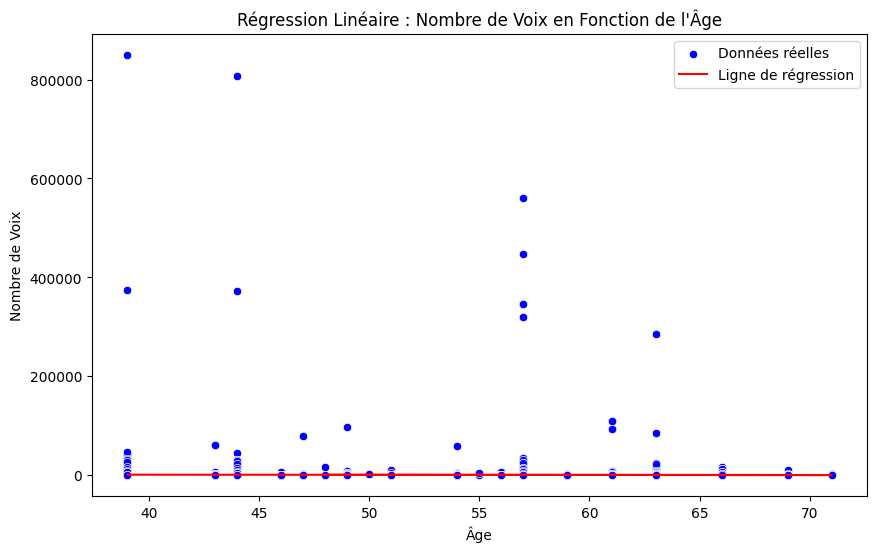

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


# Assurer que les colonnes utilisées sont numériques
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Nombre_voix'] = pd.to_numeric(df['Nombre_voix'], errors='coerce')

# Traiter les valeurs infinies et manquantes
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Age', 'Nombre_voix'], inplace=True)

# Préparer les variables
X = df[['Age']]  # Variable explicative
y = df['Nombre_voix']  # Variable cible
X = sm.add_constant(X)  # Ajouter une constante pour l'intercept

# Créer et ajuster le modèle
model = sm.OLS(y, X).fit()
print(model.summary())

# Prédictions du modèle
df['predicted'] = model.predict(X)

# Créer le graphique
plt.figure(figsize=(10, 6))

# Scatter plot des données
sns.scatterplot(x='Age', y='Nombre_voix', data=df, color='blue', label='Données réelles')

# Ligne de régression
plt.plot(df['Age'], df['predicted'], color='red', label='Ligne de régression')

plt.title('Régression Linéaire : Nombre de Voix en Fonction de l\'Âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de Voix')
plt.legend()
plt.show()


### Régression Linéaire Multiple


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     13.08
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           4.48e-52
Time:                        04:51:00   Log-Likelihood:            -3.7698e+05
No. Observations:               35844   AIC:                         7.540e+05
Df Residuals:                   35819   BIC:                         7.542e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9047.5086   2.73e+04      0.331      0.7

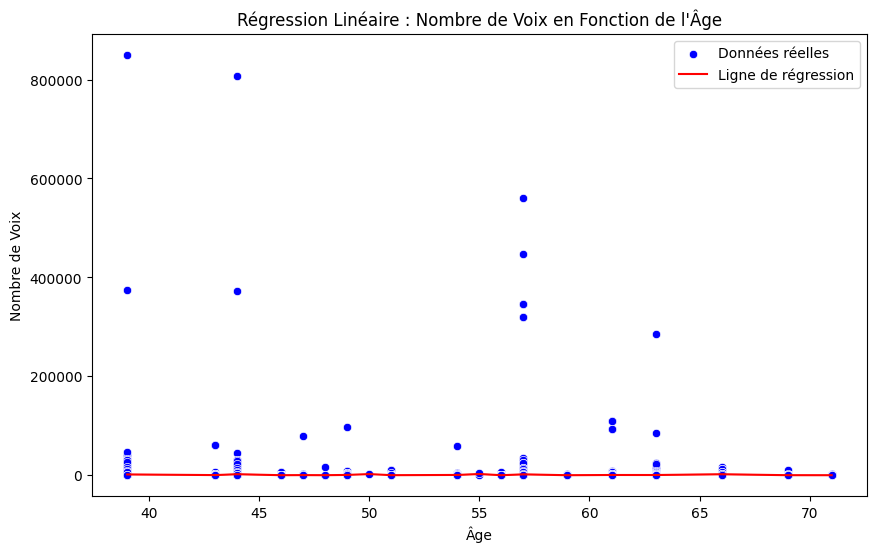

c:\Temp\ipykernel_16880\62598565.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Parti_politique'], y=df['Nombre_voix'], palette='Set1')
C:\Nouveau dossier\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


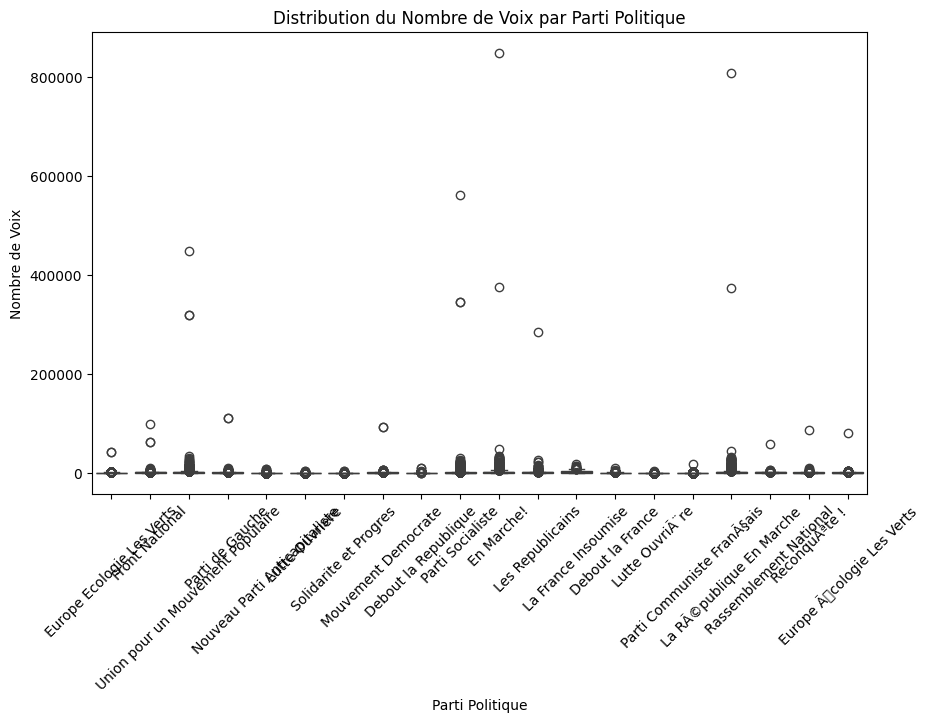

c:\Temp\ipykernel_16880\62598565.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Orientation_politique'], y=df['Nombre_voix'], palette='Set1')
C:\Nouveau dossier\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


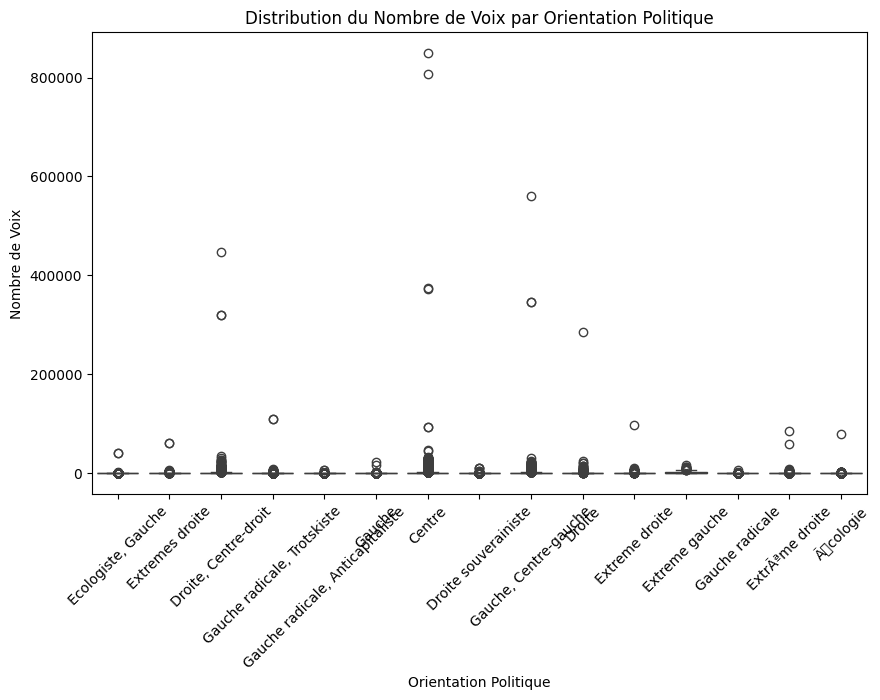

In [27]:

# Convertir les colonnes en types numériques
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Nombre_voix'] = pd.to_numeric(df['Nombre_voix'], errors='coerce')
df['Sexe'] = df['Sexe'].astype(str)
df['Parti_politique'] = df['Parti_politique'].astype(str)
df['Orientation_politique'] = df['Orientation_politique'].astype(str)

# Traiter les valeurs infinies et manquantes
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Age', 'Nombre_voix'], inplace=True)

# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df[['Age', 'Sexe', 'Parti_politique', 'Orientation_politique']], drop_first=True)

# Assurer que les colonnes encodées sont numériques
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Préparer les variables
X = df_encoded
y = df['Nombre_voix']

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Convertir X et y en arrays numpy pour éviter les problèmes de type
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

# Créer et ajuster le modèle
model = sm.OLS(y, X).fit()
print(model.summary())

# Créer des graphiques pour chaque variable explicative

# Graphique pour l'Âge
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Nombre_voix'], color='blue', label='Données réelles')
sns.lineplot(x=df['Age'], y=model.predict(X), color='red', label='Ligne de régression')
plt.title('Régression Linéaire : Nombre de Voix en Fonction de l\'Âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de Voix')
plt.legend()
plt.show()

# Graphique pour le Sexe
if 'Sexe_Homme' in df_encoded.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Sexe'], y=df['Nombre_voix'], palette='Set2')
    plt.title('Distribution du Nombre de Voix par Sexe')
    plt.xlabel('Sexe')
    plt.ylabel('Nombre de Voix')
    plt.show()

# Graphique pour le Parti Politique
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Parti_politique'], y=df['Nombre_voix'], palette='Set1')
plt.title('Distribution du Nombre de Voix par Parti Politique')
plt.xlabel('Parti Politique')
plt.ylabel('Nombre de Voix')
plt.xticks(rotation=45)
plt.show()

# Graphique pour l'Orientation Politique
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Orientation_politique'], y=df['Nombre_voix'], palette='Set1')
plt.title('Distribution du Nombre de Voix par Orientation Politique')
plt.xlabel('Orientation Politique')
plt.ylabel('Nombre de Voix')
plt.xticks(rotation=45)
plt.show()

### Régression Linéaire avec Interaction


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     14.95
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           8.75e-54
Time:                        04:54:53   Log-Likelihood:            -3.7698e+05
No. Observations:               35844   AIC:                         7.540e+05
Df Residuals:                   35822   BIC:                         7.542e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -171.6822   1432.602     -0.120      0.9

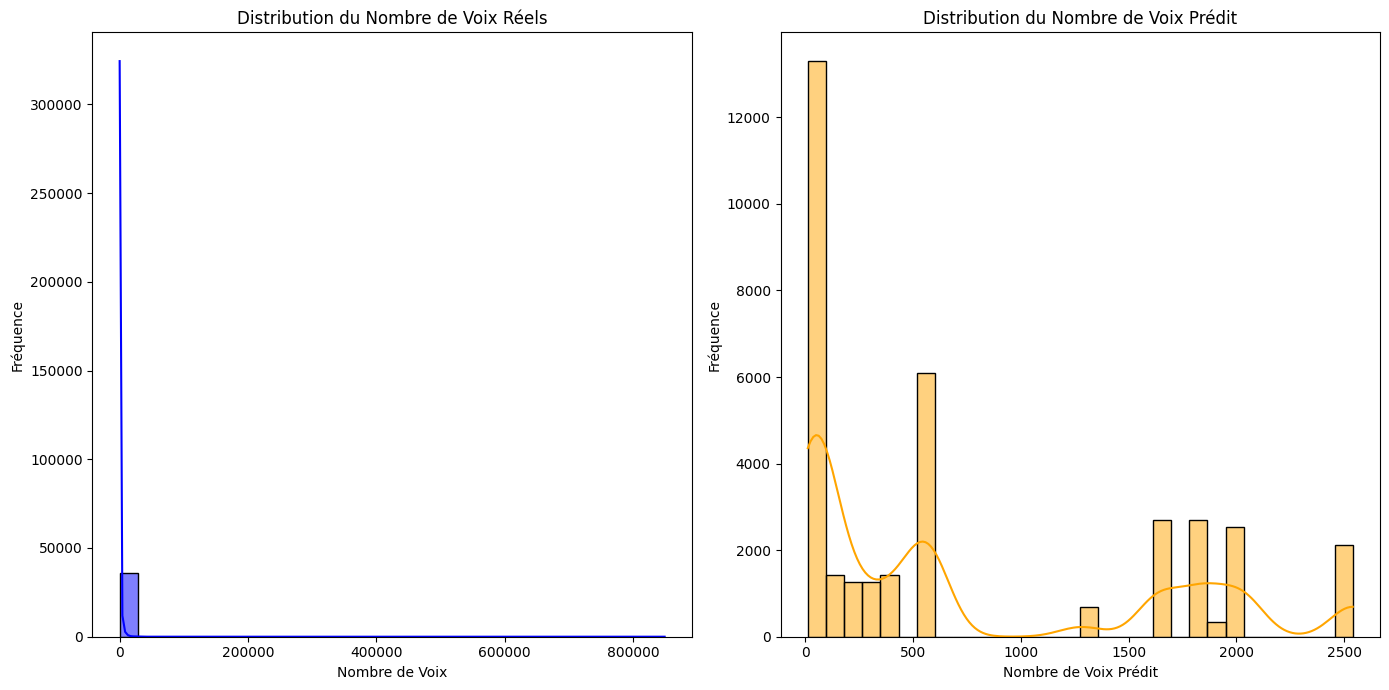

C:\Nouveau dossier\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 137 (\x89) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


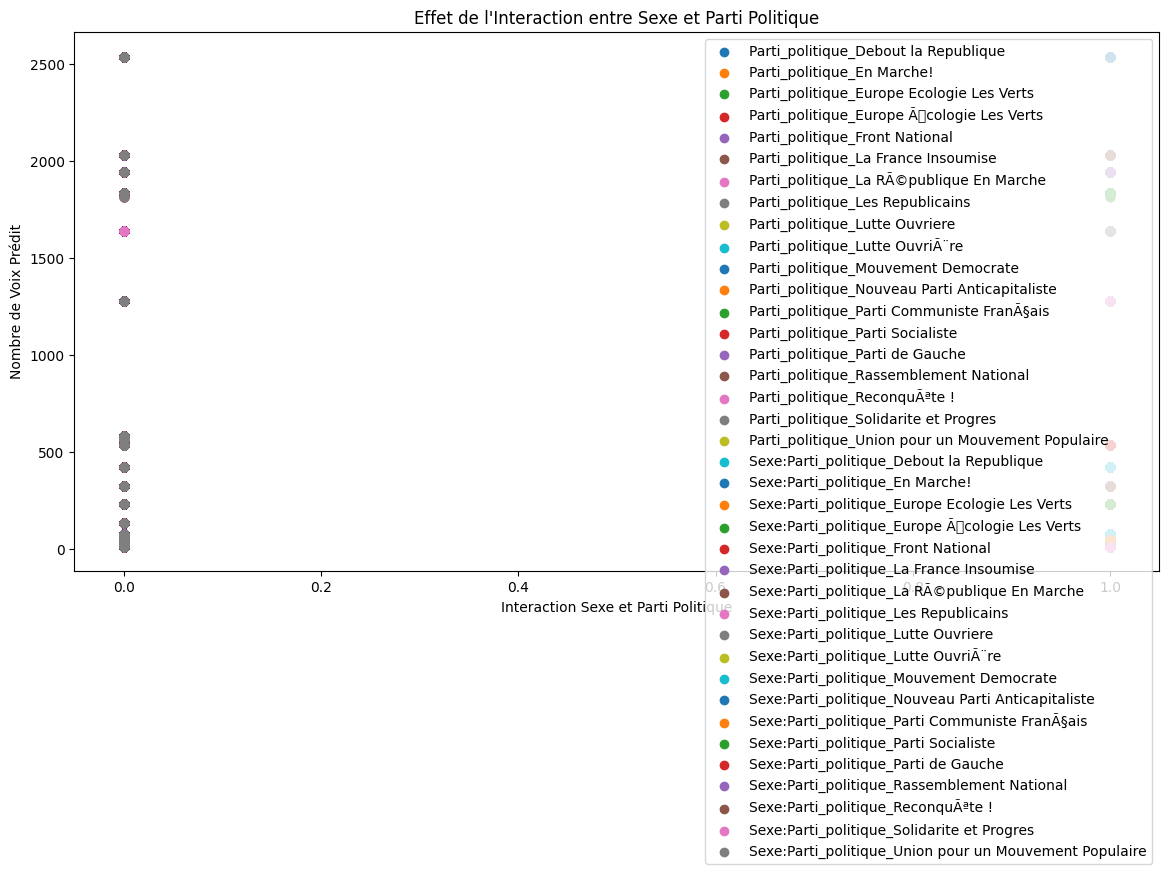

In [32]:

# Convertir les colonnes en types numériques et catégoriels
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Nombre_voix'] = pd.to_numeric(df['Nombre_voix'], errors='coerce')
df['Sexe'] = df['Sexe'].astype(str)
df['Parti_politique'] = df['Parti_politique'].astype(str)

# Traiter les valeurs infinies et manquantes
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Age', 'Nombre_voix'], inplace=True)

# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df[['Sexe', 'Parti_politique']], drop_first=True)

# Ajouter l'âge aux variables encodées
df_encoded['Age'] = df['Age']

# Créer des colonnes d'interaction entre Sexe et Parti Politique
for col in df_encoded.filter(like='Parti_politique').columns:
    df_encoded[f'Sexe:{col}'] = df_encoded['Sexe_H'] * df_encoded[col]

# Préparer les variables
X = df_encoded
y = df['Nombre_voix']

# Ajouter une constante pour l'intercept
X = sm.add_constant(X)

# Convertir X et y en arrays numpy pour éviter les problèmes de type
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

# Créer et ajuster le modèle
model = sm.OLS(y, X).fit()
print(model.summary())

# Faire des prédictions
df_encoded['Predicted_Voix'] = model.predict(X)

# Réaliser les graphiques
plt.figure(figsize=(14, 7))

# Histogramme des Nombre_voix réels
plt.subplot(1, 2, 1)
sns.histplot(df['Nombre_voix'], kde=True, color='blue', bins=30)
plt.title('Distribution du Nombre de Voix Réels')
plt.xlabel('Nombre de Voix')
plt.ylabel('Fréquence')

# Histogramme des Nombre_voix prédit
plt.subplot(1, 2, 2)
sns.histplot(df_encoded['Predicted_Voix'], kde=True, color='orange', bins=30)
plt.title('Distribution du Nombre de Voix Prédit')
plt.xlabel('Nombre de Voix Prédit')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

# Graphique de l'interaction entre Sexe et Parti Politique
plt.figure(figsize=(14, 7))

# Sélectionner les parties du parti politique et sexe pour les interactions
for col in df_encoded.filter(like='Parti_politique').columns:
    plt.scatter(df_encoded[f'Sexe_H']*df_encoded[col], df_encoded['Predicted_Voix'], label=col)

plt.xlabel('Interaction Sexe et Parti Politique')
plt.ylabel('Nombre de Voix Prédit')
plt.title('Effet de l\'Interaction entre Sexe et Parti Politique')
plt.legend(loc='upper right')
plt.show()
